#                        <p align="center"> **Traffic Signs Recognition** </p>


## 1.The first step is to import required librairies

In [2]:
"""pandas is a Python package that provides fast, flexible, and expressive data structures
designed to make working with "relational" or "labeled" data both easy and intuitive."""
import pandas as pd
"""NumPy is a Python library used for working with arrays.
It also has functions for working in domain of linear algebra, fourier transform, and matrices."""
import numpy as np

"""Matplotlib is a comprehensive library for creating static, animated, and interactive
visualizations in Python. Matplotlib makes easy things easy and hard things possible."""
import  matplotlib.pyplot as plt 
"""OpenCV is the huge open-source library for the computer vision, machine learning, and image 
processing and now it plays a major role in real-time operation which is very important
in today’s systems"""
import cv2
"""This module provides a portable way of using operating system dependent functionality. If you
just want to read or write a file see open(), if you want to manipulate paths, see the os.path 
module, and if you want to read all the lines in all the files on the command line see the 
fileinput module"""
import os
"""The Python Imaging Library adds image processing capabilities to your Python interpreter.
This library provides extensive file format support, an efficient internal representation, 
and fairly powerful image processing capabilities."""
from PIL import Image
"""scikit-learn is a Python module for machine learning built on top of SciPy and is distributed
under the 3-Clause BSD license."""
from sklearn.model_selection import train_test_split
"""Tensorflow is one of the most-used deep-learning frameworks. It’s arguably the most popular
machine learning platform on the web, with a broad range of users from those just starting out, 
to people looking for an edge in their careers and businesses. """
import tensorflow as tf 
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.models import Sequential ,load_model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense ,Flatten,Dropout
print('the cell was executed without errors')

the cell was executed without errors


## 2. Load the dataset

In [3]:
data = []
labels = []
classes = 43
Path_data=r'C:\Users\kabir\Desktop\Projects\Traffic_Recognition\data\raw'

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(Path_data,'Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print('the cell was executed without errors')

the cell was executed without errors


In [7]:
print(data.shape)
print(labels.shape)

(39209, 30, 30, 3)
(39209,)


# we will split our Dataset into Train Part and  Validation part

In [4]:
X_train,X_val,Y_train,Y_val=train_test_split(data,labels,train_size=0.8,random_state=10)

# Label encoder (Dummy variables)

In [5]:
Y_train=to_categorical(Y_train,43)

In [6]:
Y_val=to_categorical(Y_val,43)

# In this section i will  build our model architecture

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          36928     
                                                      

In [13]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=epochs, validation_data=(X_val, Y_val))

Epoch 1/15
981/981 [==============================] - 21s 7ms/step - loss: 1.7813 - accuracy: 0.5568 - val_loss: 0.4366 - val_accuracy: 0.9296
Epoch 2/15
981/981 [==============================] - 6s 6ms/step - loss: 0.5116 - accuracy: 0.8585 - val_loss: 0.1259 - val_accuracy: 0.9713
Epoch 3/15
981/981 [==============================] - 7s 7ms/step - loss: 0.3372 - accuracy: 0.9078 - val_loss: 0.0928 - val_accuracy: 0.9788
Epoch 4/15
981/981 [==============================] - 7s 7ms/step - loss: 0.3084 - accuracy: 0.9165 - val_loss: 0.0958 - val_accuracy: 0.9795
Epoch 5/15
981/981 [==============================] - 7s 7ms/step - loss: 0.2528 - accuracy: 0.9320 - val_loss: 0.0653 - val_accuracy: 0.9819
Epoch 6/15
981/981 [==============================] - 7s 7ms/step - loss: 0.2599 - accuracy: 0.9312 - val_loss: 0.0380 - val_accuracy: 0.9908
Epoch 7/15
981/981 [==============================] - 7s 7ms/step - loss: 0.2549 - accuracy: 0.9328 - val_loss: 0.0475 - val_accuracy: 0.9875
Epoch

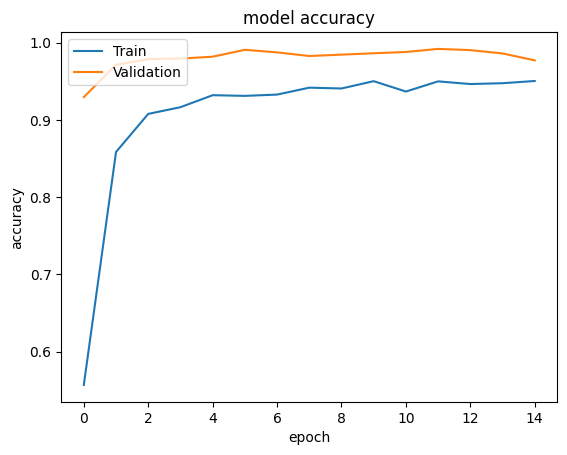

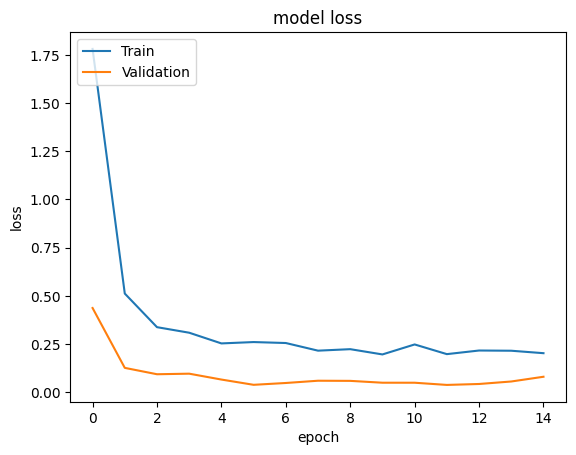

In [25]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(r"C:\Users\kabir\Desktop\Projects\Traffic_Recognition\src\visualization\Accuracy_1.png")

plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(r"C:\Users\kabir\Desktop\Projects\Traffic_Recognition\src\visualization\Loss_1.png")

plt.show()

In [27]:
Path_model=r"C:\Users\kabir\Desktop\Projects\Traffic_Recognition\models"
#model.save(os.path.join(Path_model,"Traffic_Sign_CNN_1.h5"))


In [9]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix

Path_model=r"C:\Users\kabir\Desktop\Projects\Traffic_Recognition\models"

model = load_model(os.path.join(Path_model,"Traffic_Sign_CNN_1.h5"))
# Predict the test data using the trained model
y_pred = model.predict(X_val)

# Calculate the confusion matrix of predicted vs actual values
matrix = confusion_matrix(Y_val.argmax(axis=1), y_pred.argmax(axis=1))

print("Confusion Matrix:")
print(matrix)

246/246 [==============================] - 1s 3ms/step
Confusion Matrix:
[[ 41   4   0 ...   0   0   0]
 [  0 413   4 ...   0   0   0]
 [  0   0 423 ...   0   0   0]
 ...
 [  0   0   0 ...  80   0   0]
 [  0   0   0 ...   0  51   0]
 [  0   0   0 ...   0   0  53]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    """
    arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    """
     
    if cmap is None:
        cmap = plt.get_cmap('Oranges')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylim(len(target_names)-0.5, -0.5)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.savefig(title + '.png', dpi=500, bbox_inches = 'tight')
    plt.show()
    
    
    
# a tuple for all the class names
target_names = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
plot_confusion_matrix(cm, target_names)

In [28]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model(os.path.join(Path_model,"Traffic_Sign_CNN_1.h5"))

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def kabir(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    predict_x=model.predict(image) 
    classes_x=numpy.argmax(predict_x,axis=1)[0]
    sign = classes[classes_x+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 


def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: kabir(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

1/1 [==============================] - 0s 338ms/step
Speed limit (30km/h)
1/1 [==============================] - 0s 18ms/step
Right-of-way at intersection
1/1 [==============================] - 0s 18ms/step
General caution
1/1 [==============================] - 0s 18ms/step
No passing
1/1 [==============================] - 0s 19ms/step
Speed limit (80km/h)
